In [1]:
#We need these in this file:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
import numpy as np # linear algebra
import get_lodging_scores
import SVM_classifier_general as svm_general
import pickle
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
import glob
import matplotlib.pyplot as plt
import sys
sys.path.append('cropping')
import load_read_name_extractor as lrne
from numba import jit, cuda

In [2]:
def match_pic_label_to_names_new(features, labels, names):
    n = len(labels)
    m = len(names) 
    error = []
    names_with_match = []
    for i in range(n):
        matched = False
        for j in range(m):
            if (str(labels[i][0]) == str(names[j][0]) and labels[i][2] == names[j][1]):
                    names_with_match.append(labels[j])
                    matched = True
        if (matched == False):
            error.append(labels[i])
    return names_with_match, error

In [3]:
#create array for hist 
hist_a = np.zeros(20)

#get the the labels
bin_size = 5
date_ = None
labels = svm_general.load_labels(bin_size, date_)

#get the features
features_load = np.load('Features/hog_features_(169, 534, 3)_cells_(4, 4)_block_(2, 2)_norm_L2_mir_False.npy', allow_pickle=True)
features_load = features_load.tolist()

#get the names 
path = 'names/img_names_(169, 534, 3)_cells_(4, 4)_block_(2, 2)_norm_L2_mir_False.npy'
names_load =np.load(path, allow_pickle=True)
names = lrne.it_name_extract_labels_from_img_jpeg(names_load)

#match data with labls. 
names_with_match, no_match = match_pic_label_to_names_new(features_load, labels, names)


In [4]:
len(names_with_match)

4915

In [5]:
len(no_match)

21

In [6]:
hist_a = np.zeros(len(names_with_match))

In [7]:
for i in range(len(names_with_match)):
    hist_a[i] = int(names_with_match[i][3])

In [8]:
hist_a = hist_a.astype(int)

In [9]:
hist_a

array([ 0,  1,  5, ..., 12,  1,  4])

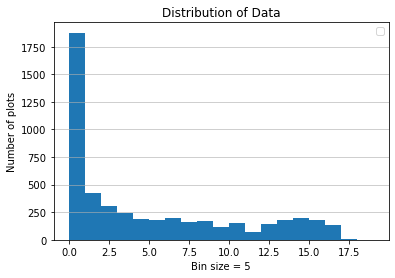

In [10]:
plt.title('Distribution of Data')
plt.xlabel('Bin size = 5')
plt.ylabel('Number of plots')
plt.grid(axis='y', alpha=0.75)
plt.legend(['Data'])
plt.hist(hist_a, bins=range(min(hist_a), 20, 1))
plt.show()